## Moving Average Strategy Test

In this work, we will extract specific stock symbol data from Yahoo Finance and elaborate moving average strategy test. Let's first define the stategy. Moving average can be simple or exponential average of stock price in specific range of time such as 20, 50 or 200. Based on your favorite time interval, this can be minutes, days, weeks or even months. Relative position of moving averages can be sign of buying or selling signal.

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import mplfinance as mpf

In [83]:
# define time range 
start = '2016-01-01' # format: YYYY-MM-DD
end = dt.datetime.now() # today

In [84]:
# favorite stock symbol 
stock='AMD'

In [85]:
df = yf.download(stock,start, end, interval='1d')
df.head() 

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,2.77,2.82,2.63,2.77,2.77,32516800
2016-01-05,2.77,2.80,2.64,2.75,2.75,12972300
2016-01-06,2.66,2.71,2.47,2.51,2.51,23759400
2016-01-07,2.43,2.48,2.26,2.28,2.28,22203500
2016-01-08,2.36,2.42,2.10,2.14,2.14,31822400


#### Moving Average Calculation

In [96]:
# Let's calulate Simple Moving Average(SMA)
short_sma= 20
long_sma = 50
SMAs=[short_sma, long_sma]

In [97]:
for i in SMAs:
    df["SMA_"+str(i)]= df.iloc[:,4].rolling(window=i).mean()

In [98]:
df.tail(3)

,Open,High,Low,Close,Adj Close,Volume,SMA_20,SMA_50
Date,,,,,,,,
2020-04-16,55.959999,58.080002,55.630001,56.950001,56.950001,102744200,47.007001,47.9364
2020-04-17,57.349998,57.759998,55.549999,56.599998,56.599998,76868700,47.846000,48.0716
2020-04-20,55.980000,58.630001,55.900002,56.970001,56.970001,71752723,48.714001,48.2246


In [99]:
position=0 # 1 means we have already entered poistion, 0 means not already entered
counter=0
percentChange=[]   # empty list to collect %changes 
for i in df.index:
    SMA_short=df['SMA_20']
    SMA_long =df['SMA_50']
    close=df['Adj Close'][i]
    
    if(SMA_short[i] > SMA_long[i]):
        print('Up trend')
        if(position==0):
            buyP=close   #buy price
            position=1   # turn position
            print("Buy at the price"+str(buyP))
        
    elif(SMA_short[i] < SMA_long[i]):
        print('Down trend')
        if(position==1):   # have a poistion in down trend
            position=0     # selling position
            sellP=close    # sell price
            print("Sell at the price"+str(sellP))
            perc=(sellP/buyP-1)*100
            percentChange.append(perc)
    if(counter==df["Adj Close"].count()-1 and position==1):
        position=0
        sellP=close
        print("Sell at the price"+str(sellP))
        perc=(sellP/buyP-1)*100
        percentChange.append(perc)

    counter+=1
print(percentChange)
            
            

Up trend
Buy at the price2.490000009536743
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up trend
Up 

### Statistics

In [90]:
gains=0
numGains=0
losses=0
numLosses=0
totReturn=1
for i in percentChange:
    if(i>0):
        gains+=i
        numGains+=1
    else:
        losses+=i
        numLosses+=1
    totReturn = totReturn*((i/100)+1)
totReturn=round((totReturn-1)*100,2)
print("This statistics is from "+str(df.index[0])+" up to now with "+str(numGains+numLosses)+" trades:")
print("SMAs used: "+str(SMAs))
print("Total return over "+str(numGains+numLosses)+ " trades: "+ str(totReturn)+"%" )

This statistics is from 2016-01-04 00:00:00 up to now with 10 trades:
SMAs used: [20, 50]
Total return over 10 trades: 927.78%


In [91]:
if (numGains>0):
    avgGain=gains/numGains
    maxReturn= str(max(percentChange))
else:
    avgGain=0
    maxReturn='unknown'

if(numLosses>0):
    avgLoss=losses/numLosses
    maxLoss=str(min(percentChange))
    ratioRR=str(-avgGain/avgLoss)  # risk-reward ratio
else:
    avgLoss=0
    maxLoss='unknown'
    ratioRR='inf'
print("Average Gain: "+ str(avgGain))
print("Average Loss: "+ str(avgLoss))
print("Max Return: "+ maxReturn)
print("Max Loss: "+ maxLoss)
print("Gain/loss ratio: "+ ratioRR)


Average Gain: 62.28728390746716
Average Loss: -6.960115926963492
Max Return: 153.81526696609106
Max Loss: -16.20305914577973
Gain/loss ratio: 8.94917334151953


In [92]:
if(numGains>0 or numLosses>0):
    batAvg=numGains/(numGains+numLosses)
else:
    batAvg=0
print("Batting Avg: "+ str(batAvg))

Batting Avg: 0.6


#### Plotting

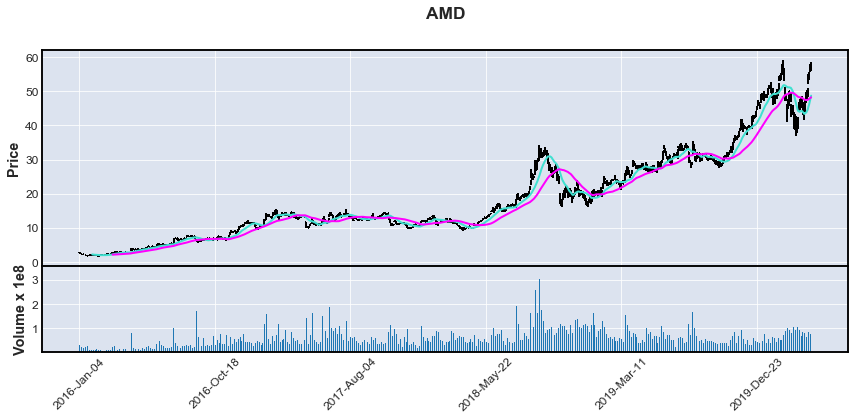

In [95]:
mpf.plot(df, type = 'ohlc',figratio=(16,6), mav=(short_sma,long_sma), 
         volume=True, title= str(stock), style='default')